In [1]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
path = "/Users/richietownsend/Nashville Software School/NSS_Data_Analytics/Capstone/bike_share/data/Biketown PDX"
list =[]
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.csv' in f:
            print('pd.read_csv(\'../data/Biketown PDX/'+f+'\')')

pd.read_csv('../data/Biketown PDX/2019_01.csv')
pd.read_csv('../data/Biketown PDX/2019_02.csv')
pd.read_csv('../data/Biketown PDX/2019_03.csv')
pd.read_csv('../data/Biketown PDX/2019_07.csv')
pd.read_csv('../data/Biketown PDX/2019_06.csv')
pd.read_csv('../data/Biketown PDX/2019_12.csv')
pd.read_csv('../data/Biketown PDX/2019_04.csv')
pd.read_csv('../data/Biketown PDX/2019_10.csv')
pd.read_csv('../data/Biketown PDX/2019_11.csv')
pd.read_csv('../data/Biketown PDX/2019_05.csv')
pd.read_csv('../data/Biketown PDX/2020_08.csv')
pd.read_csv('../data/Biketown PDX/2020_07.csv')
pd.read_csv('../data/Biketown PDX/2020_06.csv')
pd.read_csv('../data/Biketown PDX/2020_04.csv')
pd.read_csv('../data/Biketown PDX/2020_05.csv')
pd.read_csv('../data/Biketown PDX/2020_01.csv')
pd.read_csv('../data/Biketown PDX/2020_02.csv')
pd.read_csv('../data/Biketown PDX/2020_03.csv')
pd.read_csv('../data/Biketown PDX/2019_08.csv')
pd.read_csv('../data/Biketown PDX/2019_09.csv')


In [3]:
pdx0119 = pd.read_csv('../data/Biketown PDX/2019_01.csv')
pdx0219 = pd.read_csv('../data/Biketown PDX/2019_02.csv')
pdx0319 = pd.read_csv('../data/Biketown PDX/2019_03.csv')
pdx0419 = pd.read_csv('../data/Biketown PDX/2019_04.csv')
pdx0519 = pd.read_csv('../data/Biketown PDX/2019_05.csv')
pdx0619 = pd.read_csv('../data/Biketown PDX/2019_06.csv')
pdx0719 = pd.read_csv('../data/Biketown PDX/2019_07.csv')
pdx0819 = pd.read_csv('../data/Biketown PDX/2019_08.csv')
pdx0919 = pd.read_csv('../data/Biketown PDX/2019_09.csv')
pdx1019 = pd.read_csv('../data/Biketown PDX/2019_10.csv')
pdx1119 = pd.read_csv('../data/Biketown PDX/2019_11.csv')
pdx1219 = pd.read_csv('../data/Biketown PDX/2019_12.csv')
pdx0120 = pd.read_csv('../data/Biketown PDX/2020_01.csv')
pdx0220 = pd.read_csv('../data/Biketown PDX/2020_02.csv')
pdx0320 = pd.read_csv('../data/Biketown PDX/2020_03.csv')
pdx0420 = pd.read_csv('../data/Biketown PDX/2020_04.csv')
pdx0520 = pd.read_csv('../data/Biketown PDX/2020_05.csv')
pdx0620 = pd.read_csv('../data/Biketown PDX/2020_06.csv')
pdx0720 = pd.read_csv('../data/Biketown PDX/2020_07.csv')
pdx0820 = pd.read_csv('../data/Biketown PDX/2020_08.csv')

In [4]:
all_pdx = pd.concat([pdx0119, pdx0219, pdx0319, pdx0419, pdx0519, pdx0619, pdx0719, pdx0819, pdx0919, pdx1019, pdx1119, pdx1219, pdx0120, pdx0220, pdx0320, pdx0420, pdx0520, pdx0620, pdx0720, pdx0820])

In [5]:
all_pdx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419143 entries, 0 to 12752
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   RouteID           419143 non-null  int64  
 1   PaymentPlan       419143 non-null  object 
 2   StartHub          258122 non-null  object 
 3   StartLatitude     299814 non-null  float64
 4   StartLongitude    299814 non-null  float64
 5   StartDate         419143 non-null  object 
 6   StartTime         419143 non-null  object 
 7   EndHub            251986 non-null  object 
 8   EndLatitude       299776 non-null  float64
 9   EndLongitude      299776 non-null  float64
 10  EndDate           419143 non-null  object 
 11  EndTime           419143 non-null  object 
 12  TripType          136 non-null     object 
 13  BikeID            419143 non-null  int64  
 14  BikeName          418553 non-null  object 
 15  Distance_Miles    241799 non-null  float64
 16  Duration          419

In [6]:
all_pdx = all_pdx[['RouteID', 'StartDate', 'EndDate', 'StartHub', 'EndHub']]

In [7]:
all_pdx.head()

,RouteID,StartDate,EndDate,StartHub,EndHub
0,10551635,1/1/2019,1/1/2019,NW Johnson at Jamison Square,NaN
1,10551641,1/1/2019,1/1/2019,SE 29th at Belmont,NaN
2,10551644,1/1/2019,1/1/2019,NaN,NaN
3,10551674,1/1/2019,1/1/2019,NW 21st at Johnson,NW 21st at Johnson
4,10551682,1/1/2019,1/1/2019,NW 21st at Johnson,NW 11th at The Fields


In [8]:
all_pdx['StartDate'] = pd.to_datetime(all_pdx['StartDate'], format='%m/%d/%Y')
all_pdx['EndDate'] = pd.to_datetime(all_pdx['EndDate'], format='%m/%d/%Y')
all_pdx['StartDate'] = pd.to_datetime(all_pdx['StartDate'], format='%Y-%m-%d')
all_pdx['EndDate'] = pd.to_datetime(all_pdx['EndDate'], format='%Y-%m-%d')

In [9]:
all_pdx.head()

,RouteID,StartDate,EndDate,StartHub,EndHub
0,10551635,2019-01-01,2019-01-01,NW Johnson at Jamison Square,NaN
1,10551641,2019-01-01,2019-01-01,SE 29th at Belmont,NaN
2,10551644,2019-01-01,2019-01-01,NaN,NaN
3,10551674,2019-01-01,2019-01-01,NW 21st at Johnson,NW 21st at Johnson
4,10551682,2019-01-01,2019-01-01,NW 21st at Johnson,NW 11th at The Fields


In [10]:
all_pdx = all_pdx.dropna(subset=['StartHub'])
all_pdx = all_pdx.dropna(subset=['EndHub'])

In [11]:
all_pdx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168583 entries, 3 to 12750
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   RouteID    168583 non-null  int64         
 1   StartDate  168583 non-null  datetime64[ns]
 2   EndDate    168583 non-null  datetime64[ns]
 3   StartHub   168583 non-null  object        
 4   EndHub     168583 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 7.7+ MB


In [12]:
pdx_by_date = all_pdx[['StartDate', 'RouteID']]
pdx_by_date = all_pdx.groupby('StartDate').agg({'RouteID': 'count'}).reset_index()


# pdx_by_date = all_pdx.groupby(['StartDate'])['RouteID'].count()
# pdx_by_date = pd.DataFrame(pdx_by_date).reset_index()
pdx_by_date['StartDate'] = pd.to_datetime(pdx_by_date['StartDate'], format='%Y-%m-%d')
pdx_by_date.rename(columns={'StartDate':'ride_date', 'RouteID':'ride_count'}, inplace=True)

In [13]:
pdx_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ride_date   609 non-null    datetime64[ns]
 1   ride_count  609 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.6 KB


In [14]:
# pdx_by_date['month'] = pdx_by_date['ride_date'].dt.month

In [15]:
pdx_by_date['month'] = pdx_by_date['ride_date'].dt.month
pdx_by_date['year'] = pdx_by_date['ride_date'].dt.year
pdx_by_date['m_y'] = pdx_by_date['month'].apply(str) + "-" + pdx_by_date['year'].apply(str) 

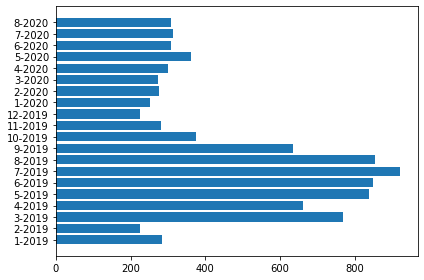

In [16]:
plt.barh('m_y', 'ride_count', data=pdx_by_date)
plt.tight_layout()

In [17]:
pdx_by_date.to_csv('../data/By_Date/pdx_by_date.csv')